In [230]:
import pandas as pd
import numpy as np
import math
import cmath
import numpy as np
from scipy import interpolate, fftpack, signal
import matplotlib.pyplot as plt
%matplotlib inline

## Injsig

In [231]:
time=[] #collect time samples
amplitude=[] #amlitude data; collect sampled strain of GW signal
#reading .csv file and plotting its column vs column
df1=pd.read_csv('injsig.csv')
print('total number of samples is', len(df1.Time))

df1.head() #display function

total number of samples is 109674


,Amplitude,Time
0,0.128988,0.000000
1,-0.074019,0.000061
2,0.169942,0.000122
3,-0.085080,0.000183
4,0.125861,0.000244


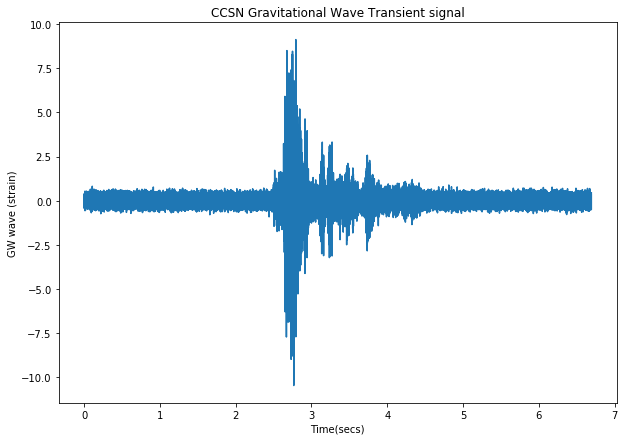

In [232]:
#plot of signal
time=df1.Time
amplitude=df1.Amplitude
plt.figure(figsize = [10,7])
plt.title('CCSN Gravitational Wave Transient signal')
plt.plot(time,amplitude)
plt.xlabel('Time(secs)')
plt.ylabel('GW wave (strain)')
plt.show()

In [233]:
#sampling period and frequency
ts=time[1]-time[0]
print('sampling time period is',ts)
print('sampling frequency is',1/ts)

sampling time period is 6.1e-05
sampling frequency is 16393.442623


In [234]:
#FT of signal
Amplitude=np.array(amplitude) #makes numpy array
Time=np.array(time)

Amp=fftpack.fft(Amplitude) #FFT of signal; complex form
f = fftpack.fftfreq(len(Time),ts) #gives corresponding frequencies
abs_Amp=abs(Amp) #magnitude of complex forms


f = fftpack.fftshift(f) #0,1,2,...-2,-1 to ...-2,-1,0,1,2,...
abs_Amp = fftpack.fftshift(abs_Amp)
    
   


Normalization condition of DFT/FFT: $$\frac{1}{N}\sum |X(f)|^2=\sum |X(t)|^2$$
where; $$X(f)=fft(X(t))$$


From Parseval's relation, we need the energy of the signal same in both time and frequency domains and follow the condition:


$$\sum |\tilde{X}(f)|^2df=\sum |X(t)|^2dt$$
where;
$$df=\frac{1}{dt*N}$$
$$\tilde{X}(f)=aX(f)$$
Here, '$a$' is the scaling factor of the signal in frequency domain to make it follow the Normalization condition.

Now, from Normalization condition, we get;

$\sum |\tilde{X}(f)|^2df=\sum |X(t)|^2dt$

or, $\sum |aX(f)|^2\frac{1}{dt*N}=\sum |X(t)|^2dt$

or, $a^2\frac{1}{N}\sum |X(f)|^2=dt^2\sum |X(t)|^2$

or, $a=dt$

Thus, we need to scale the fft by the sampling frequency $t_s=dt$

In [235]:
abs_Amp = ts*abs_Amp

In [236]:
#Verification of above relations
int_freq = sum(abs(Amp)**2)/len(Amp)
print(int_freq)
int_time = sum(Amplitude**2)
print(int_time)
print(int_time/int_freq)

df=f[1]-f[0]
int_freq = sum(abs_Amp**2)*df
print(int_freq)
int_time = sum(Amplitude**2)*ts
print(int_time)
print(int_time/int_freq)

print(ts)
print(1/ts)
print(len(time), len(abs_Amp))
print(1/len(time))
print(df)
print(1/(ts*len(time)))

40603.2567163
40603.2567162
0.999999999998
2.47679865971
2.47679865969
0.999999999991
6.1e-05
16393.442623
109674 109674
9.117931323741269e-06
0.149474283997
0.149474283996


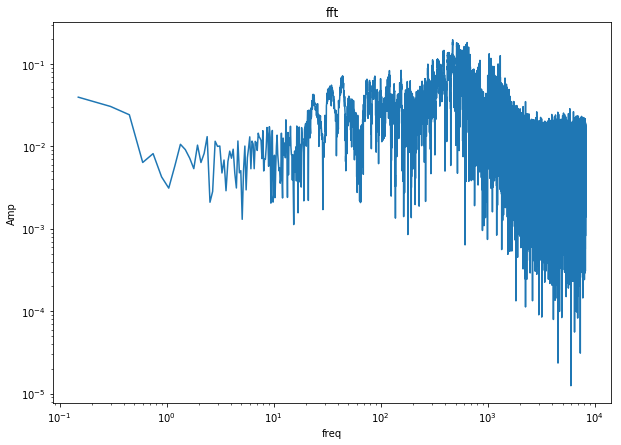

In [237]:
#frequency spectrum
n = len(f)
f = f[int(n/2)+1:n-1] #take only positive frequencies; symmetric 
abs_Amp = 2.0*abs_Amp[int(n/2)+1:n-1] #signal folded in frequency axis to conserve energy; scaled by ts from normalization condition

plt.figure(figsize = [10,7])
plt.title('fft')
plt.loglog(f, abs_Amp)
plt.xlabel('freq')
plt.ylabel('Amp')
plt.show()

# M10, M13, M19

In [238]:
#M10
time1=[]
amplitude1=[]
df2=pd.read_csv('M10.csv')
#M19
time3=[]
amplitude2=[]
df4=pd.read_excel('M19.xlsx')
#M13
time4=[]
amplitude3=[]
df5=pd.read_excel('M13.xlsx')

print('The length of M10, M19 and M13 data are respectively; ', len(df2.Time), len(df4.Time), len(df5.Time))

The length of M10, M19 and M13 data are respectively;  36864 32768 36864


In [239]:
df2.head() 

,Time,Amplitude
0,1186766060,0.000000e+00
1,1186766060,4.700000e-38
2,1186766060,-2.350000e-38
3,1186766060,-1.760000e-38
4,1186766060,1.180000e-38


In [240]:
df4.head() 

,Time,Amplitude
0,1.186766e+09,2.938736e-38
1,1.186766e+09,6.759093e-38
2,1.186766e+09,-2.938736e-38
3,1.186766e+09,-3.012204e-38
4,1.186766e+09,2.057115e-38


In [241]:
df5.head() 

,Time,Amplitude
0,1.186766e+09,-3.232609e-38
1,1.186766e+09,6.906029e-38
2,1.186766e+09,2.057115e-38
3,1.186766e+09,-1.322431e-38
4,1.186766e+09,5.730535e-38


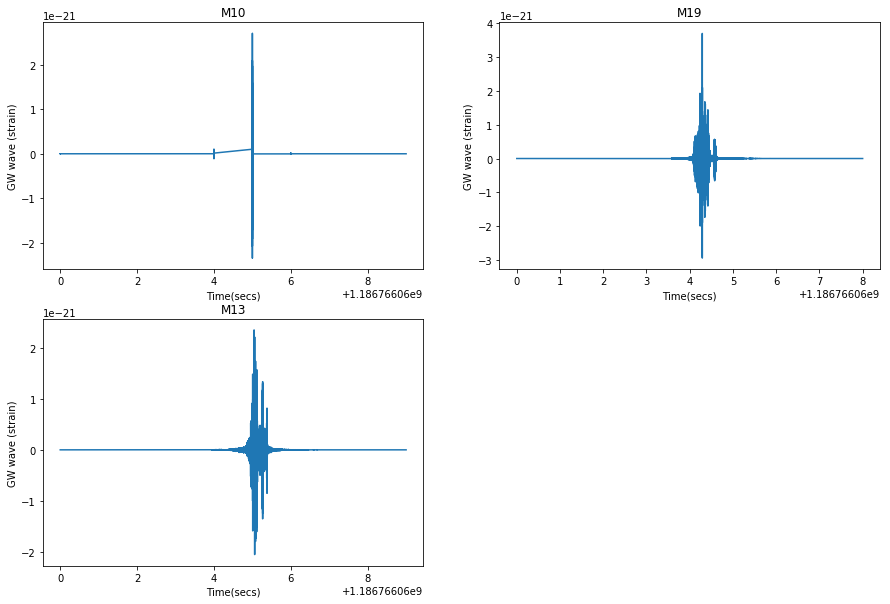

In [242]:
time1=df2.Time
amplitude1=df2.Amplitude
time3=df4.Time
amplitude2=df4.Amplitude
time4=df5.Time
amplitude3=df5.Amplitude


plt.figure(figsize = [15,10])

plt.subplot(2,2,1)
plt.title('M10')
plt.plot(time1,amplitude1)
plt.xlabel('Time(secs)')
plt.ylabel('GW wave (strain)')

plt.subplot(2,2,2)
plt.title('M19')
plt.plot(time3,amplitude2)
plt.xlabel('Time(secs)')
plt.ylabel('GW wave (strain)')

plt.subplot(2,2,3)
plt.title('M13')
plt.plot(time4,amplitude3)
plt.xlabel('Time(secs)')
plt.ylabel('GW wave (strain)')
plt.show()

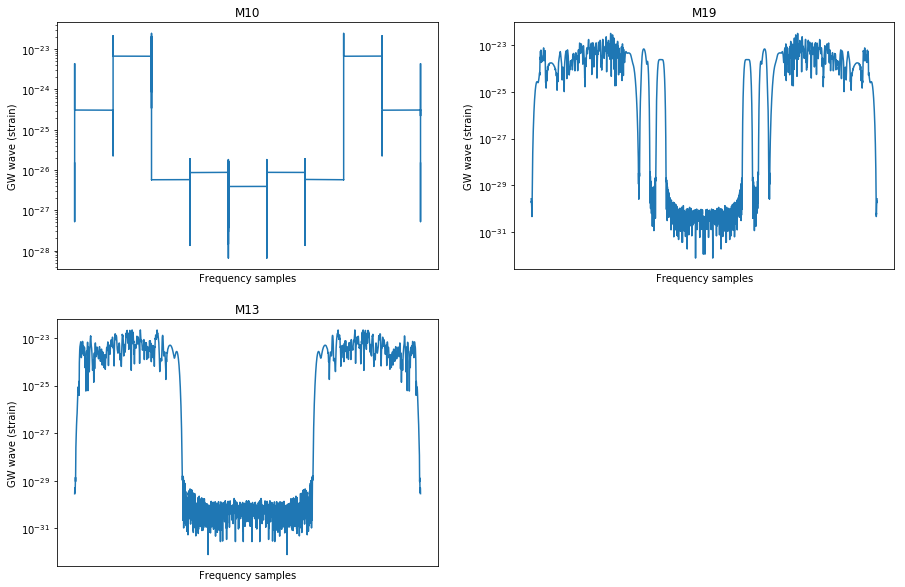

In [243]:
#both sided transform
Amplitude1=np.array(amplitude1)
Amplitude2=np.array(amplitude2)
Amplitude3=np.array(amplitude3)
Time1=np.array(time1)
Time2=np.array(time3)
Time3=np.array(time4)


ts3=Time3[1]-Time3[0] #ts1=ts3
dAmp1=np.fft.fft(Amplitude1)
df1=Time1
dabs_Amp1=abs(dAmp1)
dabs_Amp1 = ts3*dabs_Amp1

ts2=Time2[1]-Time2[0]
dAmp2=np.fft.fft(Amplitude2)
df2 = Time2
dabs_Amp2=abs(dAmp2)
dabs_Amp2 = ts2*dabs_Amp2


dAmp3=np.fft.fft(Amplitude3)
df3 = Time3
dabs_Amp3=abs(dAmp3)
dabs_Amp3 = ts3*dabs_Amp3

plt.figure(figsize = [15,10])

plt.subplot(2,2,1)
plt.title('M10')
plt.loglog(df1,dabs_Amp1)
plt.xlabel('Frequency samples')
plt.ylabel('GW wave (strain)')

plt.subplot(2,2,2)
plt.title('M19')
plt.loglog(df2,dabs_Amp2)
plt.xlabel('Frequency samples')
plt.ylabel('GW wave (strain)')

plt.subplot(2,2,3)
plt.title('M13')
plt.loglog(df3,dabs_Amp3)
plt.xlabel('Frequency samples')
plt.ylabel('GW wave (strain)')
plt.show()

In [244]:
#no negative frequencies; folding

ts3=Time3[1]-Time3[0]
Amp1=fftpack.fft(Amplitude1)
f1 = fftpack.fftfreq(len(Time1),ts3)
abs_Amp1=abs(Amp1)
f1 = fftpack.fftshift(f1)
abs_Amp1 = fftpack.fftshift(abs_Amp1)
n1 = len(f1)
f1 = f1[int(n1/2)+1:n1-1]
abs_Amp1 = ts3*2.0*abs_Amp1[int(n1/2)+1:n1-1] #ts1=ts3

ts2=Time2[1]-Time2[0]
Amp2=fftpack.fft(Amplitude2)
f2 = fftpack.fftfreq(len(Time2),ts2)
abs_Amp2=abs(Amp2)
f2 = fftpack.fftshift(f2)
abs_Amp2 = fftpack.fftshift(abs_Amp2)
n2 = len(f2)
f2 = f2[int(n2/2)+1:n2-1]
abs_Amp2 = ts2*2.0*abs_Amp2[int(n2/2)+1:n2-1]


Amp3=fftpack.fft(Amplitude3)
f3 = fftpack.fftfreq(len(Time3),ts3)
abs_Amp3=abs(Amp3)
f3 = fftpack.fftshift(f3)
abs_Amp3 = fftpack.fftshift(abs_Amp3)
n3 = len(f3)
f3 = f3[int(n3/2)+1:n3-1]
abs_Amp3 = ts3*2.0*abs_Amp3[int(n3/2)+1:n3-1]


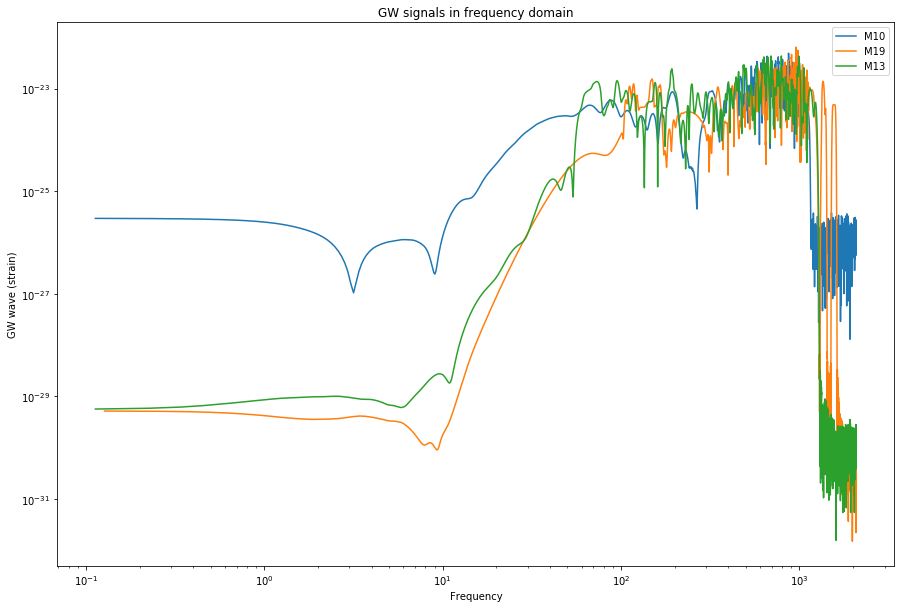

In [245]:
plt.figure(figsize = [15,10])


plt.title('GW signals in frequency domain')
plt.loglog(f1,abs_Amp1,label='M10')




plt.loglog(f2,abs_Amp2,label='M19')




plt.loglog(f3,abs_Amp3,label='M13')
plt.xlabel('Frequency')
plt.ylabel('GW wave (strain)')
plt.legend()
plt.show()

In [246]:
print(len(f1))
print(len(f2))
print(len(f3))

18430
16382
18430


## Whitened Noise data

In [247]:
time2=[]
noise=[]
df3=pd.read_excel('noiseH1.xlsx')
print('Length of the noise data; ',len(df3.Noise))

Length of the noise data;  49357


In [248]:
df3.head() 

,Noise
0,-73.290241
1,-64.533752
2,-62.881756
3,-68.597933
4,-79.467850


In [249]:
noise=df3.Noise
for i in range(0,len(noise)):
    time2.append(i)

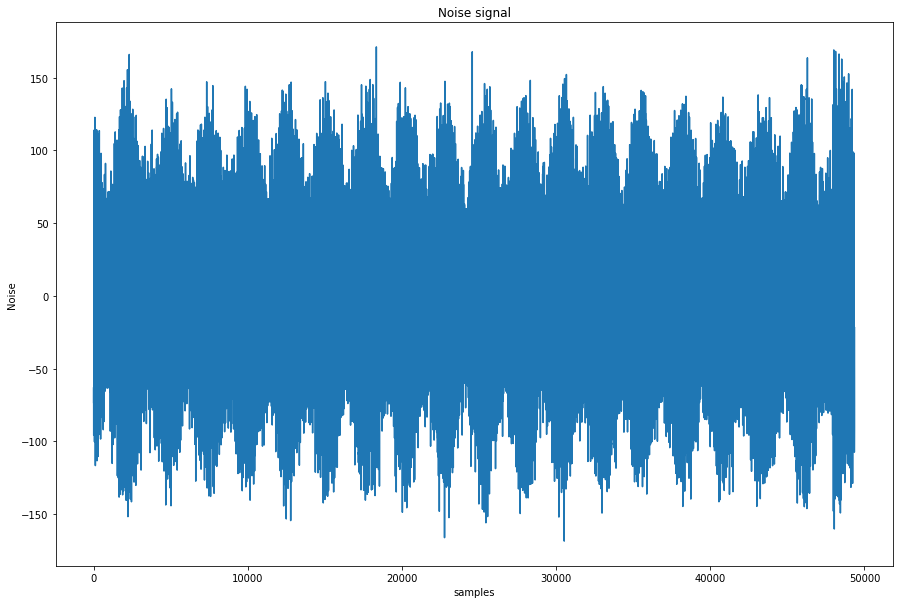

In [250]:
plt.figure(figsize = [15,10])
plt.title('Noise signal')
plt.plot(time2,noise)
plt.xlabel('samples')
plt.ylabel('Noise')
plt.show()

In [251]:
noise1=np.array(noise)
time_arr=np.array(time2)
#print(noise)

## SNR

In [252]:
def integral(apple,h):
    sum=apple[0]+apple[len(apple)-1]
    for i in range(1,len(apple)-1):
        if (i%3==0):
            sum=sum+2*apple[i]
        else:
            sum=sum+3*apple[i]
    return (3*h*sum/8)

In [253]:
noise_transformed=fftpack.fft(noise1)
fasd=fftpack.fftfreq(len(time_arr),1/16384) #sample spacing of noise signals in secs=1/16384
asd=abs(noise_transformed)
fasd = fftpack.fftshift(fasd)
asd = fftpack.fftshift(asd)
    

tck = interpolate.splrep(fasd,asd,s=0)

df2 = f2[2]-f2[1]
#asd2 = asd/(len(asd)*df2)
asd2 = asd/16384
asd2 = interpolate.splev(f2,tck,der=0) 
psd2 = asd2**2
snrsq2 = integral(abs_Amp2**2/psd2,df2)
snr2 = np.sqrt(snrsq2)

df1 = f1[2]-f1[1]
#asd1 = asd/(len(asd)*df1)
asd1 = asd/16384
asd1 = interpolate.splev(f1,tck,der=0)
psd1 = asd1**2
snrsq1 = integral(abs_Amp1**2/psd1,df1)
snr1 = np.sqrt(snrsq1)

df3 = f3[2]-f3[1]
#asd3 = asd/(len(asd)*df3)
asd3 = asd/16384
asd3 = interpolate.splev(f3,tck,der=0)
psd3 = asd3**2
snrsq3 = integral(abs_Amp3**2/psd3,df3)
snr3 = np.sqrt(snrsq3)


print('SNR of M10, M19, M13 are respectively;', snr1,snr2,snr3) 


SNR of M10, M19, M13 are respectively; 9.75820991908e-25 1.52705059341e-24 2.33687353754e-24


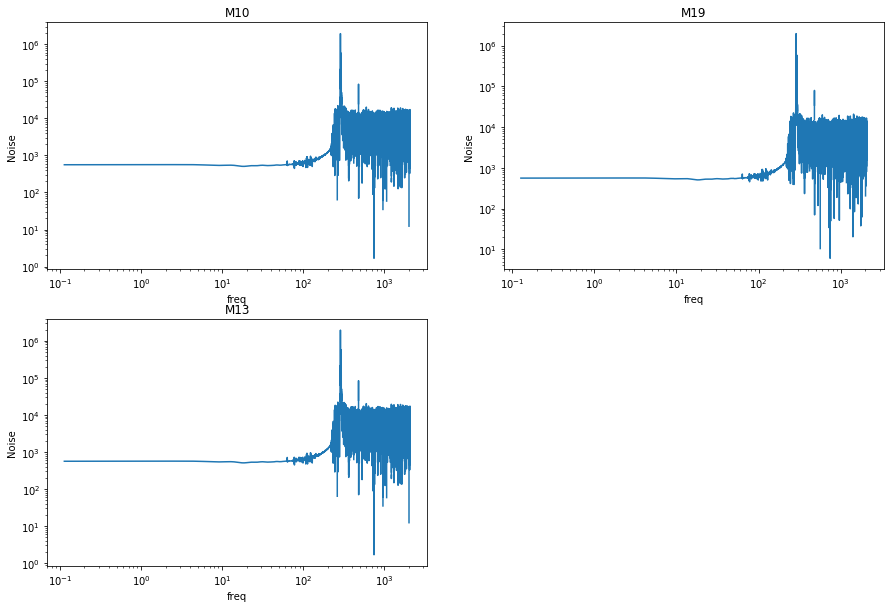

In [254]:
plt.figure(figsize = [15,10])
plt.subplot(2,2,1)
plt.title('M10')
plt.loglog(f1,asd1)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.subplot(2,2,2)
plt.title('M19')
plt.loglog(f2,asd2)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.subplot(2,2,3)
plt.title('M13')
plt.loglog(f3,asd3)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

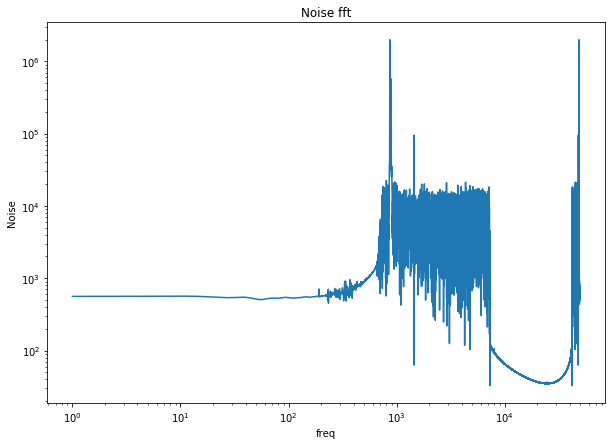

In [255]:
#complete fft noise samples
noise_transformed=fftpack.fft(noise1)
plt.figure(figsize = [10,7])
plt.title('Noise fft')
plt.loglog(time_arr,abs(noise_transformed))
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

# Non whitened noise 1

In [256]:
#import h5py
#import matplotlib.pyplot as plt
#import matplotlib as mpl
#mpl.rcParams['agg.path.chunksize'] = 10000
#f = h5py.File('L-L1_GWOSC_O2_16KHZ_R1-1164603392-4096.hdf5', 'r')
#print(list(f.keys()))
#print(list(f['strain'].keys()))
#print(type(f['strain/Strain']))
#plt.plot(f['strain/Strain'])
#plt.show()
#print(len(f))
#np.savetxt('X.txt', f['strain/Strain'])

In [257]:
#Read noise data
samples=[]
noise=[]
df1=pd.read_excel('L-L1.xlsx')
print('Length of the noise data; ',len(df1.Noise))

Length of the noise data;  983040


In [258]:
df1.head() 

,Noise
0,1.018524e-18
1,1.188343e-18
2,1.377472e-18
3,1.532829e-18
4,1.670383e-18


In [259]:
noise=df1.Noise
print('The noise signal duration in seconds is;', len(noise)/16384)
samples=np.arange(0, len(noise)/16384, 1/16384)

The noise signal duration in seconds is; 60.0


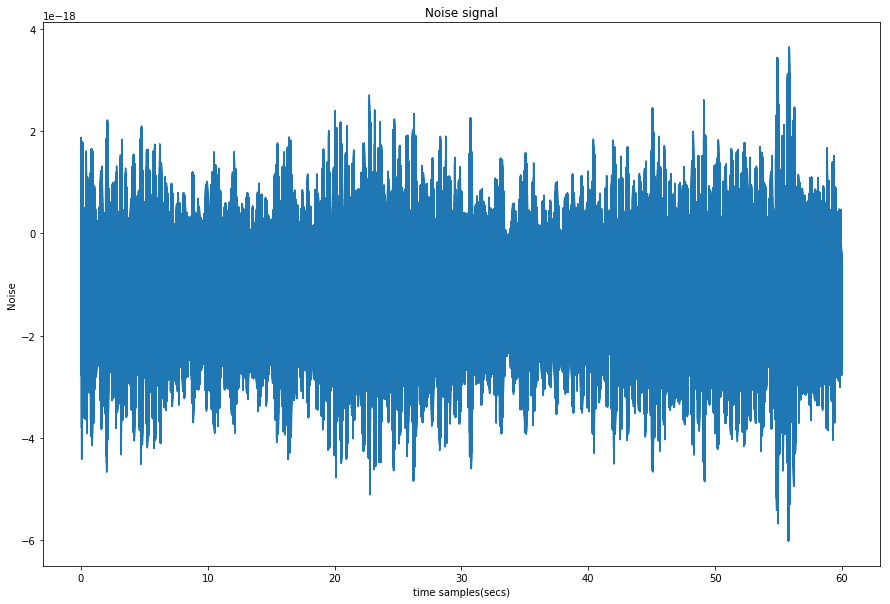

In [260]:
plt.figure(figsize = [15,10])
plt.title('Noise signal')
plt.plot(samples,noise)
plt.xlabel('time samples(secs)')
plt.ylabel('Noise')
plt.show()

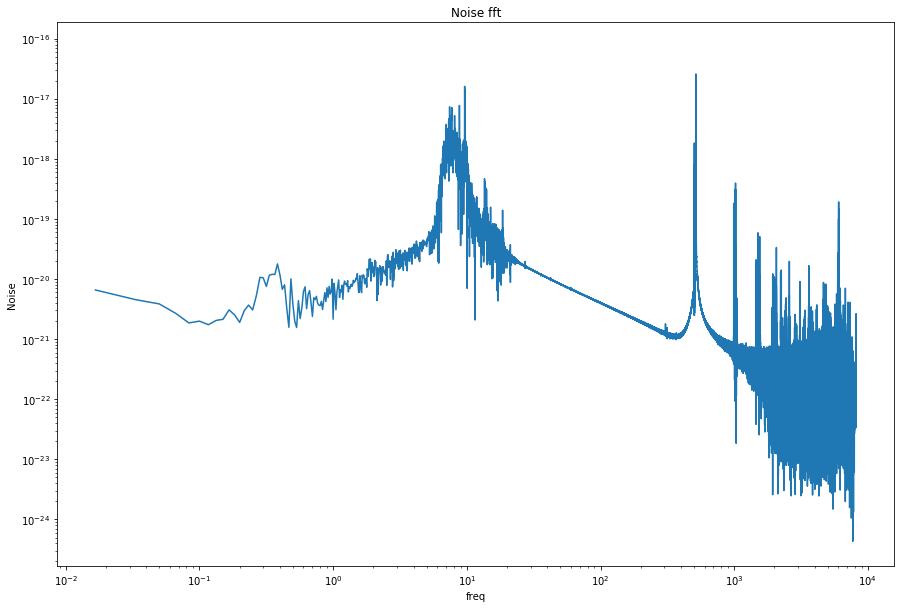

In [261]:
noise1=np.array(noise)
time_arr=np.array(samples)
noise_transformed=fftpack.fft(noise1)
fasd=fftpack.fftfreq(len(time_arr),1/16384) #sample spacing of noise signals in secs=1/16384
asd=abs(noise_transformed)
asd=asd/16384
plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(fasd,asd)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

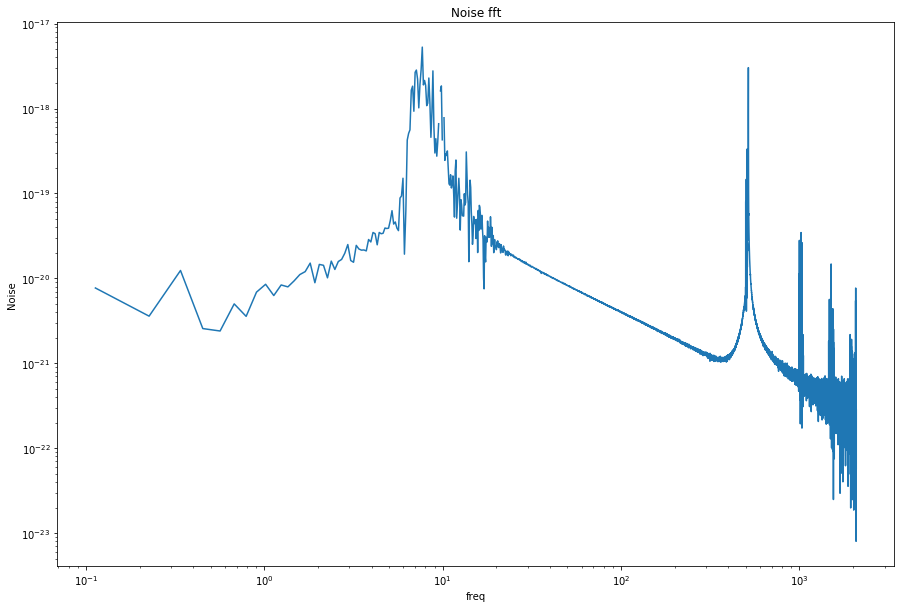

In [262]:
#For M10 signal
noise_transformed=fftpack.fft(noise1)
fasd=fftpack.fftfreq(len(time_arr),1/16384) #sample spacing of noise signals in secs=1/16384
asd=abs(noise_transformed)
df1 = f1[2]-f1[1]
#asd1 = asd/(len(asd)*df1) 
asd1 = asd/16384 #scaling from normalization condition; using df1 of signal or df1=1/16384 ??
fasd = fftpack.fftshift(fasd)
asd1 = fftpack.fftshift(asd1)
    

tck1 = interpolate.splrep(fasd,asd1,s=0) #spline interpolate using noise data
asd1 = interpolate.splev(f1,tck1,der=0) #resampling at frequency f1; to get same freq components as signal

#Now, the length of the signal has changed; df and dt also have changed




plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(f1,asd1)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

In [263]:
print(len(asd))
print(len(asd1))
dfasd=fasd[1]-fasd[0]
print(dfasd)
print(df1)

print(1/(len(asd)*df1))
print(1/(len(asd)*dfasd))
print(1/16384)

983040
18430
0.0166666666664
0.11298686969
9.00328159332e-06
6.10351562509e-05
6.103515625e-05


In [264]:
psd1 = asd1**2


snrsq1 = sum(abs_Amp1**2/psd1)*df1
snr1 = np.sqrt(snrsq1)
print('SNR of M10 signal using direct sum;', snr1) 

snrsq1 = integral(abs_Amp1**2/psd1,df1)
print('SNR of M10 signal using SImpsons 3/8th rule;', snr1) 


SNR of M10 signal using direct sum; 0.466623593903
SNR of M10 signal using SImpsons 3/8th rule; 0.466623593903


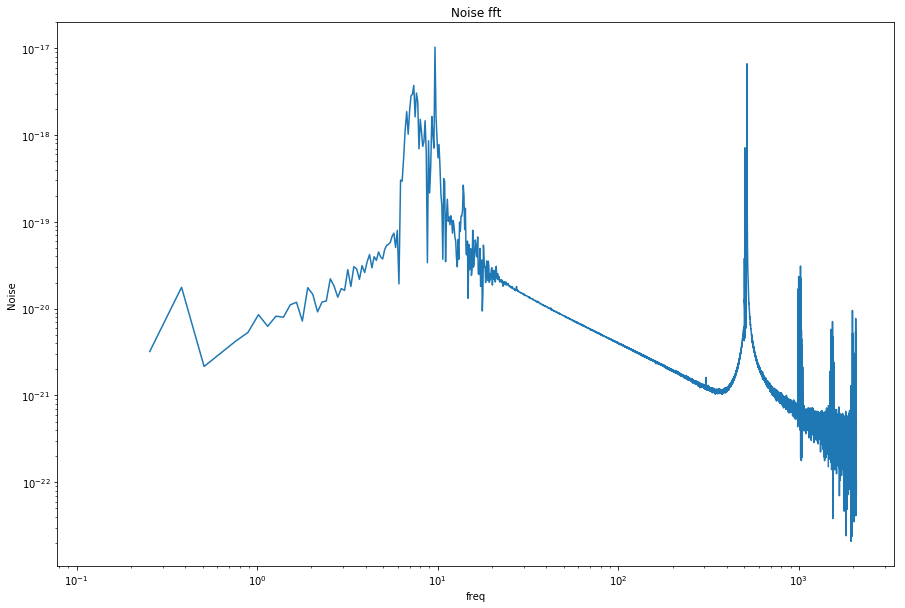

In [265]:
#For M19 signal
noise_transformed=fftpack.fft(noise1)
fasd=fftpack.fftfreq(len(time_arr),1/16384) #sample spacing of noise signals in secs=??
asd=abs(noise_transformed)
df2 = f2[2]-f2[1]
#asd2 = asd/(len(asd)*df2)
asd2 = asd/16384
fasd = fftpack.fftshift(fasd)
asd2 = fftpack.fftshift(asd2)
    

tck2 = interpolate.splrep(fasd,asd2,s=0)
asd2 = interpolate.splev(f2,tck2,der=0) 





plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(f2,asd2)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

In [266]:
psd2 = asd2**2


snrsq2 = sum(abs_Amp2**2/psd2)*df2
snr2 = np.sqrt(snrsq2)
print('SNR of M19 signal using direct sum;', snr2) 

snrsq2 = integral(abs_Amp2**2/psd2,df2)
snr2 = np.sqrt(snrsq2)
print('SNR of M19 signal using SImpsons 3/8th rule;', snr2) 

SNR of M19 signal using direct sum; 0.626673172407
SNR of M19 signal using SImpsons 3/8th rule; 0.627713660766


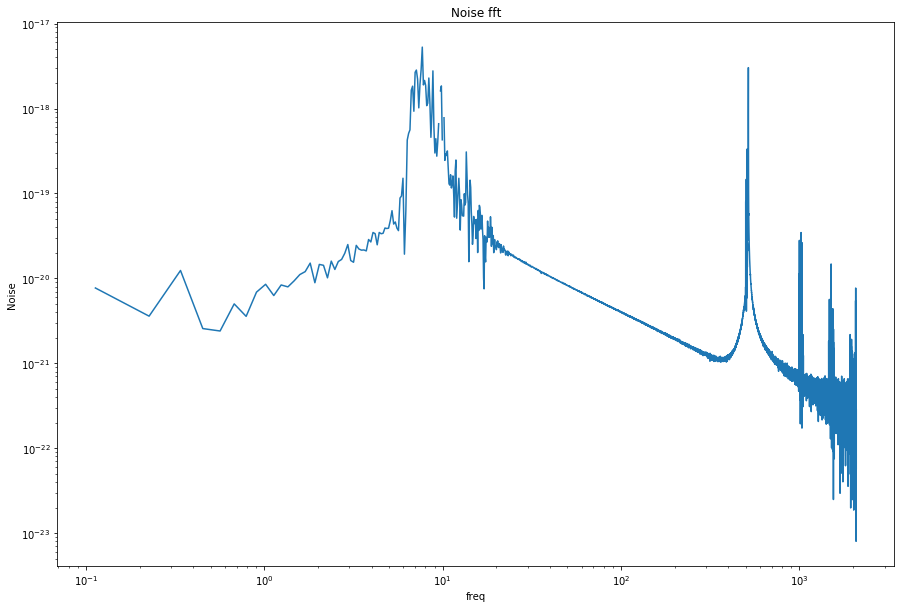

In [267]:
#For M13 signal
noise_transformed=fftpack.fft(noise1)
fasd=fftpack.fftfreq(len(time_arr),1/16384) #sample spacing of noise signals in secs=??
asd=abs(noise_transformed)
df3 = f3[2]-f3[1]
#asd3 = asd/(len(asd)*df3)
asd3 = asd/16384
fasd = fftpack.fftshift(fasd)
asd3 = fftpack.fftshift(asd3)
    

tck3 = interpolate.splrep(fasd,asd3,s=0)
asd3 = interpolate.splev(f3,tck3,der=0) 





plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(f3,asd3)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

In [268]:
psd3 = asd3**2


snrsq3 = sum(abs_Amp3**2/psd3)*df3
snr3 = np.sqrt(snrsq3)
print('SNR of M13 signal using Direct sum;', snr3) 

snrsq3 = integral(abs_Amp3**2/psd3,df3)
snr3 = np.sqrt(snrsq3)
print('SNR of M13 signal using SImpsons 3/8th rule;', snr3) 

SNR of M13 signal using Direct sum; 0.42768845808
SNR of M13 signal using SImpsons 3/8th rule; 0.427930913718


## Morozova2018

In [269]:
#Read noise data
samples=[]
noise=[]
df1=pd.read_excel('Morozova2018.xlsx')
print('Length of the noise data; ',len(df1.Noise))

Length of the noise data;  36019


In [270]:
df1.head() 

,Time,Noise
0,-0.259447,0.000147
1,-0.259398,0.000147
2,-0.259345,0.000147
3,-0.259291,0.000147
4,-0.259245,0.000147


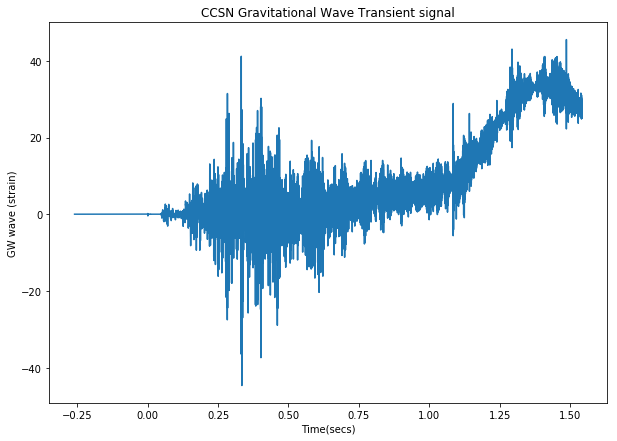

In [271]:
#plot of signal
time=df1.Time
amplitude=df1.Noise
plt.figure(figsize = [10,7])
plt.title('CCSN Gravitational Wave Transient signal')
plt.plot(time,amplitude)
plt.xlabel('Time(secs)')
plt.ylabel('GW wave (strain)')
plt.show()

In [272]:
#sampling period and frequency
ts=time[1]-time[0]
fs=1/ts
print('sampling time period is',ts)
print('sampling frequency is',fs)

sampling time period is 4.90754900001e-05
sampling frequency is 20376.770563


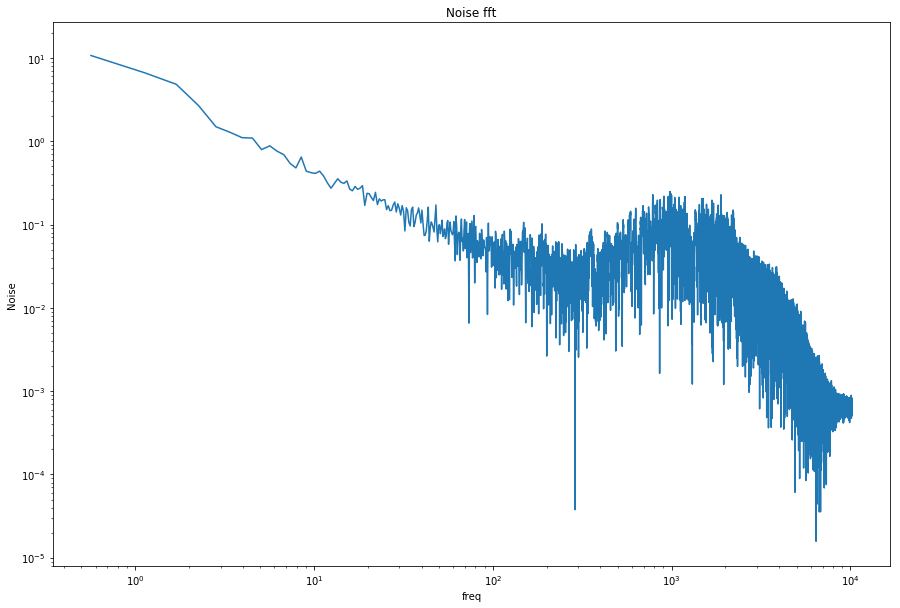

In [273]:
noise1=np.array(amplitude)
time_arr=np.array(time)
noise_transformed=fftpack.fft(noise1)
fasd=fftpack.fftfreq(len(time_arr),ts) #sample spacing of noise signals in secs
asd=ts*abs(noise_transformed)
plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(fasd,asd)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

## O3H1, O3L1

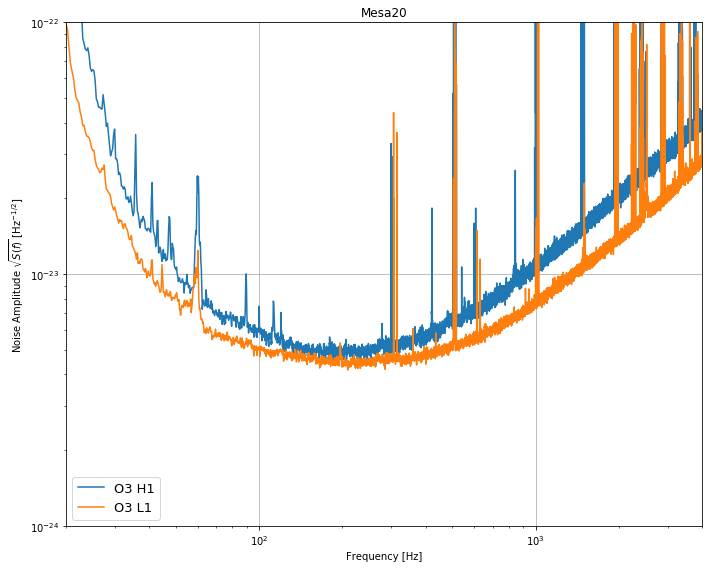

In [274]:
O3H1 = np.loadtxt("aligo_O3actual_H1.txt")
O3L1 = np.loadtxt("aligo_O3actual_L1.txt")

plt.figure(figsize=(10,8))
plt.title('Mesa20')
plt.loglog(O3H1[:,0],O3H1[:,1],label="O3 H1")
plt.loglog(O3L1[:,0],O3L1[:,1],label="O3 L1")
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'Noise Amplitude $\sqrt{S(f)}$ [Hz$^{-1/2}$]')
plt.xlim([20.0,4.0e3])
plt.ylim([1.0e-24,1.0e-22])
plt.legend(fontsize=13)
plt.grid()
plt.tight_layout()
plt.savefig("mesa20.png")
plt.show()

# SNR calculations taking O3H1 noise 

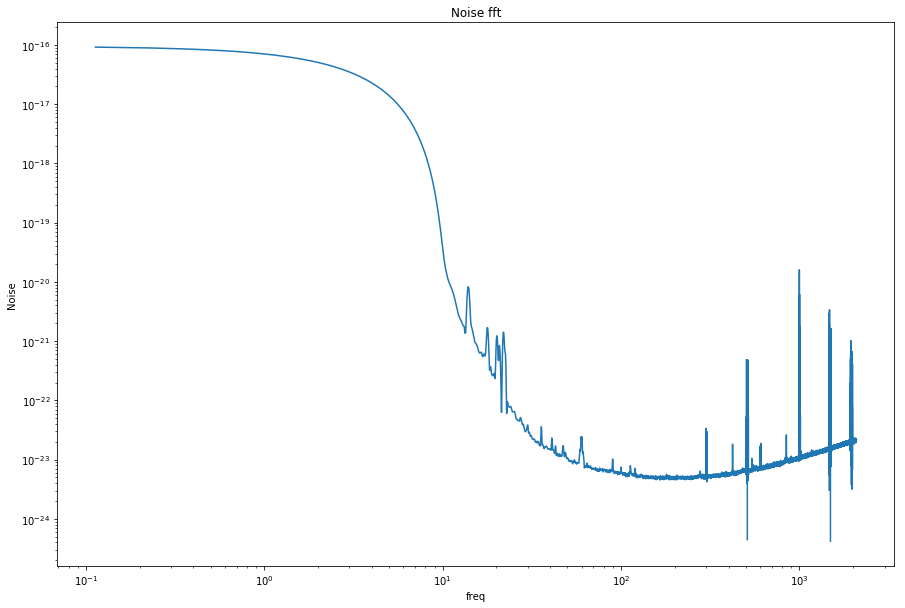

In [275]:
#For M10 signal


    

tck1 = interpolate.splrep(O3H1[:,0],O3H1[:,1],s=0) #spline interpolate using noise data
asd1 = interpolate.splev(f1,tck1,der=0) #resampling at frequency f1; to get same freq components as signal

#Now, the length of the signal has changed; df and dt also have changed




plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(f1,asd1)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

In [276]:
print(len(asd1))
print(len(abs_Amp1))

18430
18430


In [277]:
asd1=np.array(asd1)
psd1 = asd1**2

df1 = f1[2]-f1[1]
snrsq1 = sum(abs_Amp1**2/psd1)*df1
snr1 = np.sqrt(snrsq1)
print('SNR of M10 signal using direct sum;', snr1) 

snrsq1 = integral(abs_Amp1**2/psd1,df1)
print('SNR of M10 signal using SImpsons 3/8th rule;', snr1) 

SNR of M10 signal using direct sum; 56.2080288442
SNR of M10 signal using SImpsons 3/8th rule; 56.2080288442


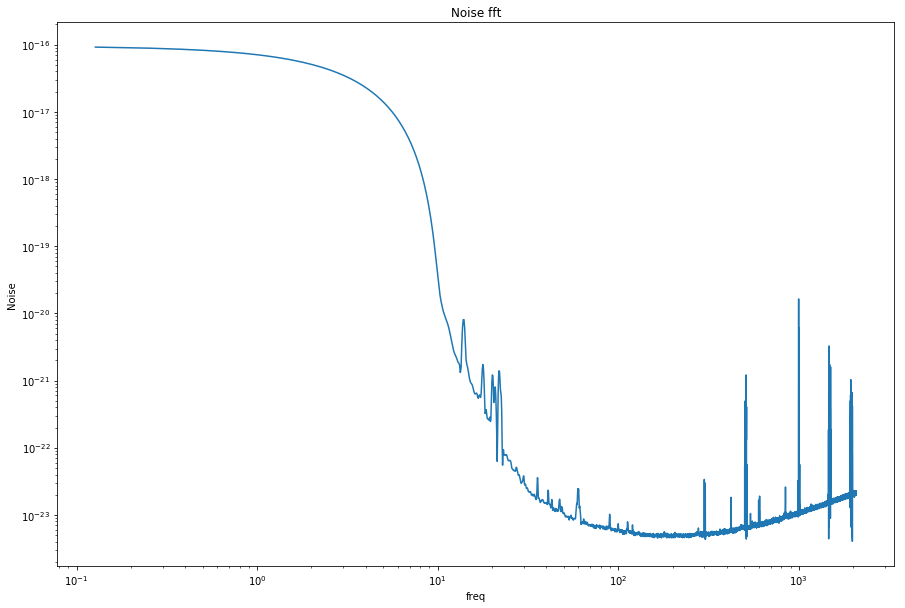

In [278]:
#For M19 signal


    

tck2 = interpolate.splrep(O3H1[:,0],O3H1[:,1],s=0) #spline interpolate using noise data
asd2 = interpolate.splev(f2,tck2,der=0) #resampling at frequency f2; to get same freq components as signal

#Now, the length of the signal has changed; df and dt also have changed




plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(f2,asd2)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

In [279]:
print(len(asd2))
print(len(abs_Amp2))

16382
16382


In [280]:
asd2=np.array(asd2)
psd2 = asd2**2

df2 = f2[2]-f2[1]
snrsq2 = sum(abs_Amp2**2/psd2)*df2
snr2 = np.sqrt(snrsq2)
print('SNR of M19 signal using direct sum;', snr2) 

snrsq2 = integral(abs_Amp2**2/psd2,df2)
print('SNR of M19 signal using SImpsons 3/8th rule;', snr2) 

SNR of M19 signal using direct sum; 50.3300865169
SNR of M19 signal using SImpsons 3/8th rule; 50.3300865169


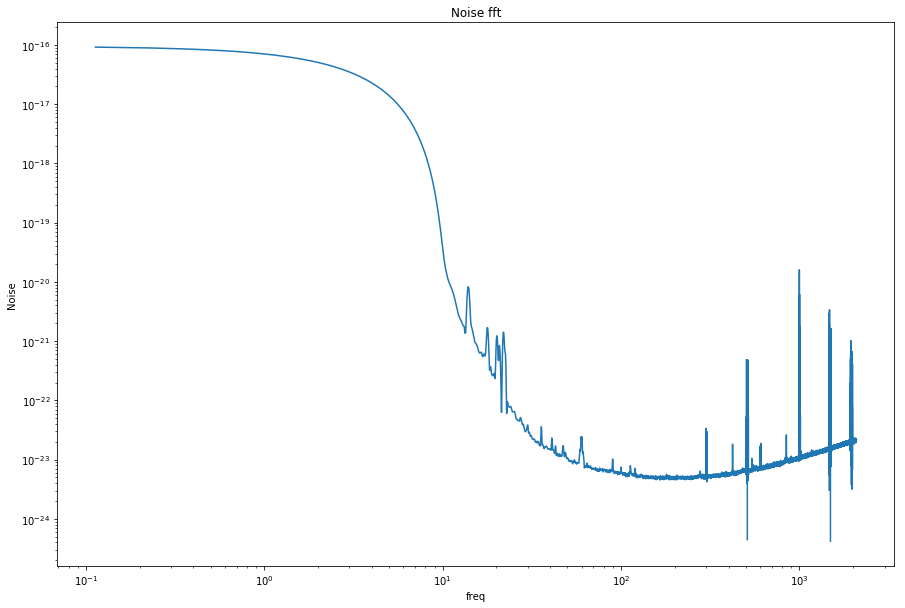

In [281]:
#For M13 signal


    

tck3 = interpolate.splrep(O3H1[:,0],O3H1[:,1],s=0) #spline interpolate using noise data
asd3 = interpolate.splev(f3,tck3,der=0) #resampling at frequency f3; to get same freq components as signal

#Now, the length of the signal has changed; df and dt also have changed




plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(f3,asd3)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

In [282]:
print(len(asd3))
print(len(abs_Amp3))

18430
18430


In [283]:
asd3=np.array(asd3)
psd3 = asd3**2

df3 = f3[2]-f3[1]
snrsq3 = sum(abs_Amp3**2/psd3)*df3
snr3 = np.sqrt(snrsq3)
print('SNR of M13 signal using direct sum;', snr3) 

snrsq3 = integral(abs_Amp3**2/psd3,df3)
print('SNR of M13 signal using SImpsons 3/8th rule;', snr3) 

SNR of M13 signal using direct sum; 56.377334395
SNR of M13 signal using SImpsons 3/8th rule; 56.377334395


## SNR calculations taking O3L1 noise

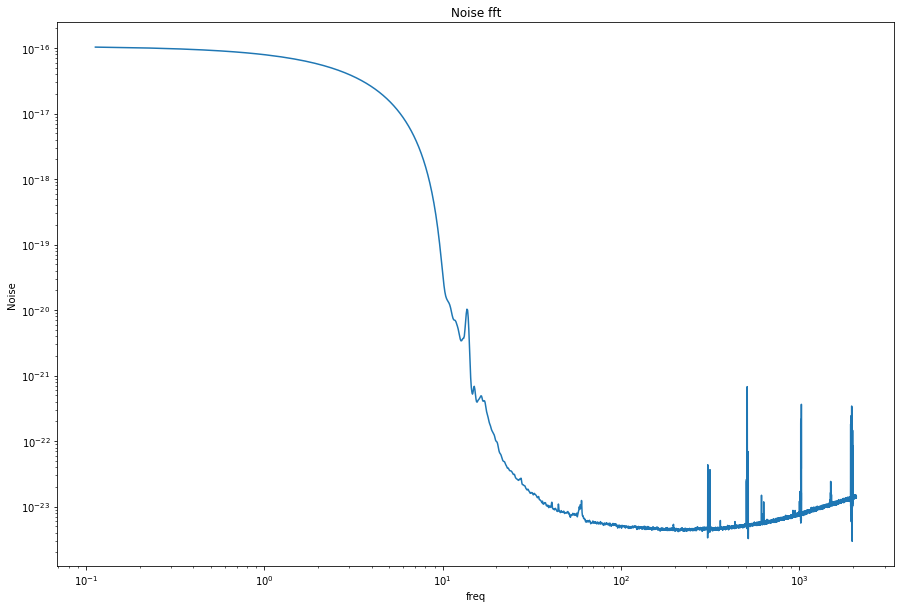

In [284]:
#For M10 signal


    

tck1 = interpolate.splrep(O3L1[:,0],O3L1[:,1],s=0) #spline interpolate using noise data
asd1 = interpolate.splev(f1,tck1,der=0) #resampling at frequency f1; to get same freq components as signal

#Now, the length of the signal has changed; df and dt also have changed




plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(f1,asd1)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

In [285]:
print(len(asd1))
print(len(abs_Amp1))

18430
18430


In [286]:
asd1=np.array(asd1)
psd1 = asd1**2

df1 = f1[2]-f1[1]
snrsq1 = sum(abs_Amp1**2/psd1)*df1
snr1 = np.sqrt(snrsq1)
print('SNR of M10 signal using direct sum;', snr1) 

snrsq1 = integral(abs_Amp1**2/psd1,df1)
print('SNR of M10 signal using SImpsons 3/8th rule;', snr1) 

SNR of M10 signal using direct sum; 73.1101331737
SNR of M10 signal using SImpsons 3/8th rule; 73.1101331737


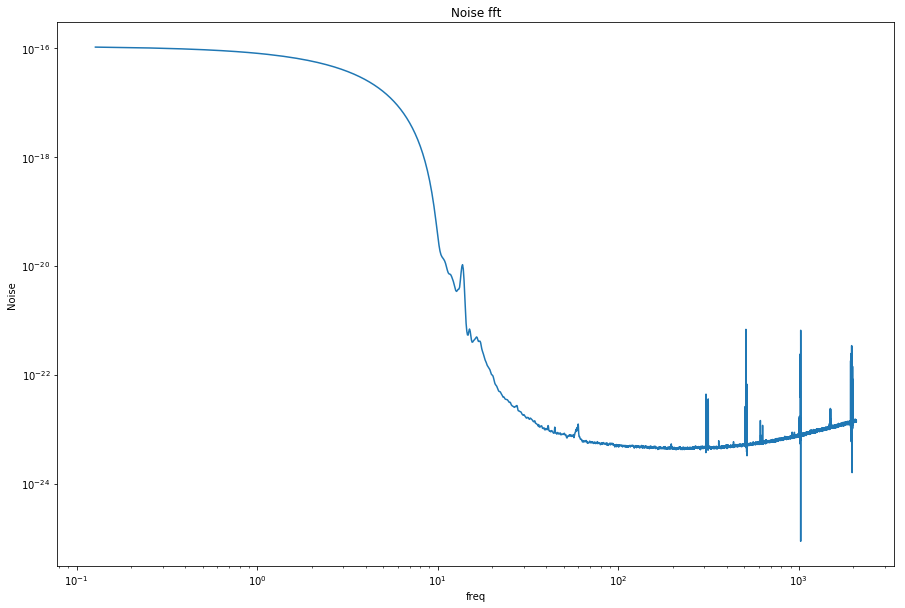

In [287]:
#For M19 signal


    

tck2 = interpolate.splrep(O3L1[:,0],O3L1[:,1],s=0) #spline interpolate using noise data
asd2 = interpolate.splev(f2,tck2,der=0) #resampling at frequency f2; to get same freq components as signal

#Now, the length of the signal has changed; df and dt also have changed




plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(f2,asd2)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

In [288]:
print(len(asd2))
print(len(abs_Amp2))

16382
16382


In [289]:
asd2=np.array(asd2)
psd2 = asd2**2

df2 = f2[2]-f2[1]
snrsq2 = sum(abs_Amp2**2/psd2)*df2
snr2 = np.sqrt(snrsq2)
print('SNR of M10 signal using direct sum;', snr2) 

snrsq2 = integral(abs_Amp2**2/psd2,df2)
print('SNR of M10 signal using SImpsons 3/8th rule;', snr2) 

SNR of M10 signal using direct sum; 102.090897883
SNR of M10 signal using SImpsons 3/8th rule; 102.090897883


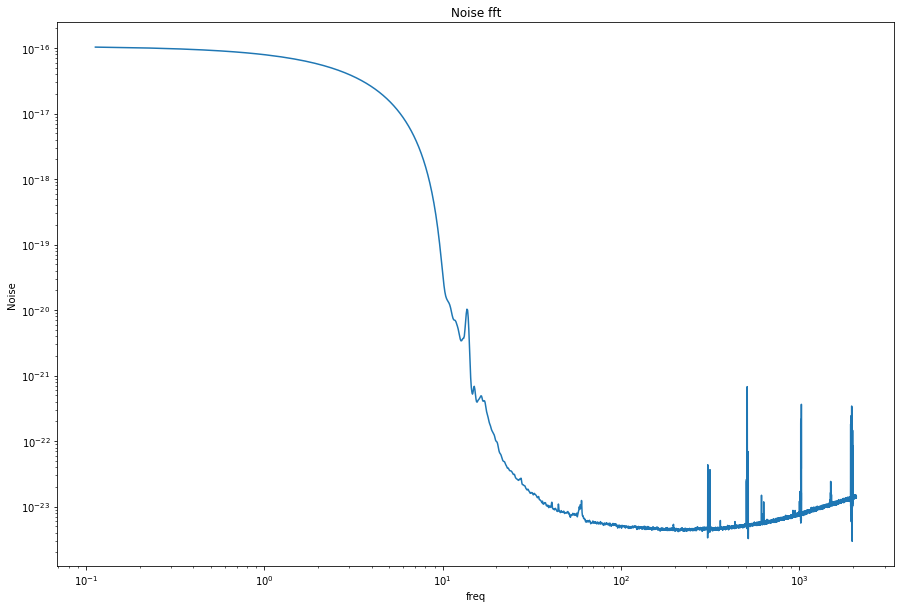

In [290]:
#For M13 signal


    

tck3 = interpolate.splrep(O3L1[:,0],O3L1[:,1],s=0) #spline interpolate using noise data
asd3 = interpolate.splev(f3,tck3,der=0) #resampling at frequency f3; to get same freq components as signal

#Now, the length of the signal has changed; df and dt also have changed




plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(f3,asd3)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

In [291]:
print(len(asd3))
print(len(abs_Amp3))

18430
18430


In [292]:
asd3=np.array(asd3)
psd3 = asd3**2

df3 = f3[2]-f3[1]
snrsq3 = sum(abs_Amp3**2/psd3)*df3
snr3 = np.sqrt(snrsq3)
print('SNR of M10 signal using direct sum;', snr3) 

snrsq3 = integral(abs_Amp3**2/psd3,df3)
print('SNR of M10 signal using SImpsons 3/8th rule;', snr3) 

SNR of M10 signal using direct sum; 72.5835680694
SNR of M10 signal using SImpsons 3/8th rule; 72.5835680694


## Signal and Noise spectra

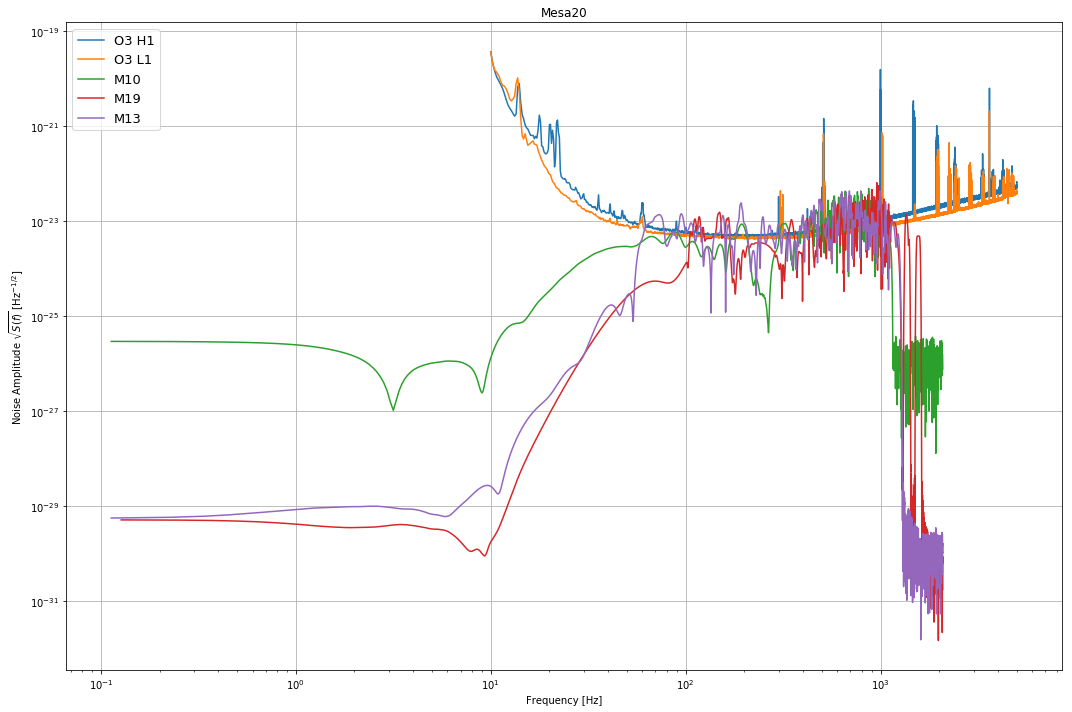

In [294]:
plt.figure(figsize = [15,10])
plt.title('Mesa20')
plt.loglog(O3H1[:,0],O3H1[:,1],label="O3 H1")
plt.loglog(O3L1[:,0],O3L1[:,1],label="O3 L1")
plt.loglog(f1,abs_Amp1,label='M10')
plt.loglog(f2,abs_Amp2,label='M19')
plt.loglog(f3,abs_Amp3,label='M13')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'Noise Amplitude $\sqrt{S(f)}$ [Hz$^{-1/2}$]')
plt.legend(fontsize=13)
plt.grid()
plt.tight_layout()
plt.savefig("mesa20.png")
plt.show()

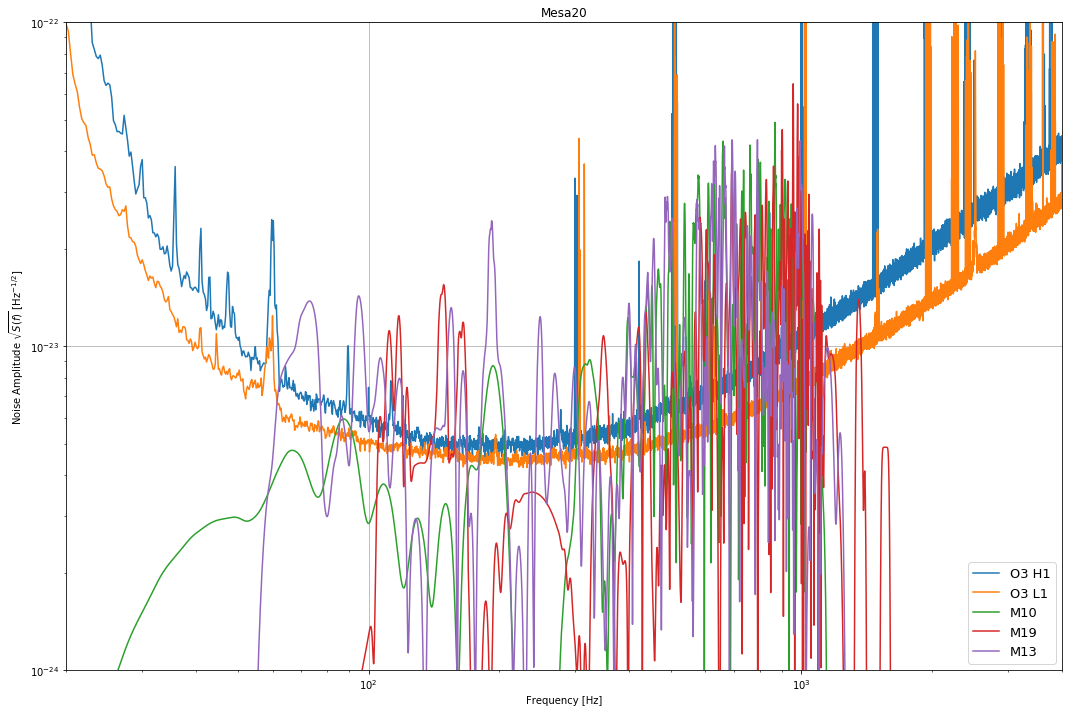

In [295]:
plt.figure(figsize = [15,10])
plt.title('Mesa20')
plt.loglog(O3H1[:,0],O3H1[:,1],label="O3 H1")
plt.loglog(O3L1[:,0],O3L1[:,1],label="O3 L1")
plt.loglog(f1,abs_Amp1,label='M10')
plt.loglog(f2,abs_Amp2,label='M19')
plt.loglog(f3,abs_Amp3,label='M13')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'Noise Amplitude $\sqrt{S(f)}$ [Hz$^{-1/2}$]')
plt.xlim([20.0,4.0e3])
plt.ylim([1.0e-24,1.0e-22])
plt.legend(fontsize=13)
plt.grid()
plt.tight_layout()
plt.savefig("mesa20.png")
plt.show()